Looking in links: https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html
Cloning into 'PaddleDetection'...
remote: Enumerating objects: 258353, done.
remote: Counting objects: 100% (751/751), done.
remote: Compressing objects: 100% (382/382), done.
remote: Total 258353 (delta 599), reused 370 (delta 369), pack-reused 257602 (from 3)
Receiving objects: 100% (258353/258353), 422.20 MiB | 17.94 MiB/s, done.
Resolving deltas: 100% (210514/210514), done.
/content/PaddleDetection/PaddleDetection/PaddleDetection/PaddleDetection/PaddleDetection/PaddleDetection/PaddleDetection/PaddleDetection
[10/02 04:51:26] ppdet.utils.checkpoint INFO: Skipping import of the encryption module.
[10/02 04:51:29] ppdet.utils.checkpoint INFO: ['yolo_head.anchor_points', 'yolo_head.stride_tensor'] in pretrained weight is not used in the model, and its will not be loaded
[10/02 04:51:29] ppdet.utils.checkpoint INFO: Finish loading model weights: /root/.cache/paddle/weights/ppyoloe_crn_l_300e_coco.pdparams
[1

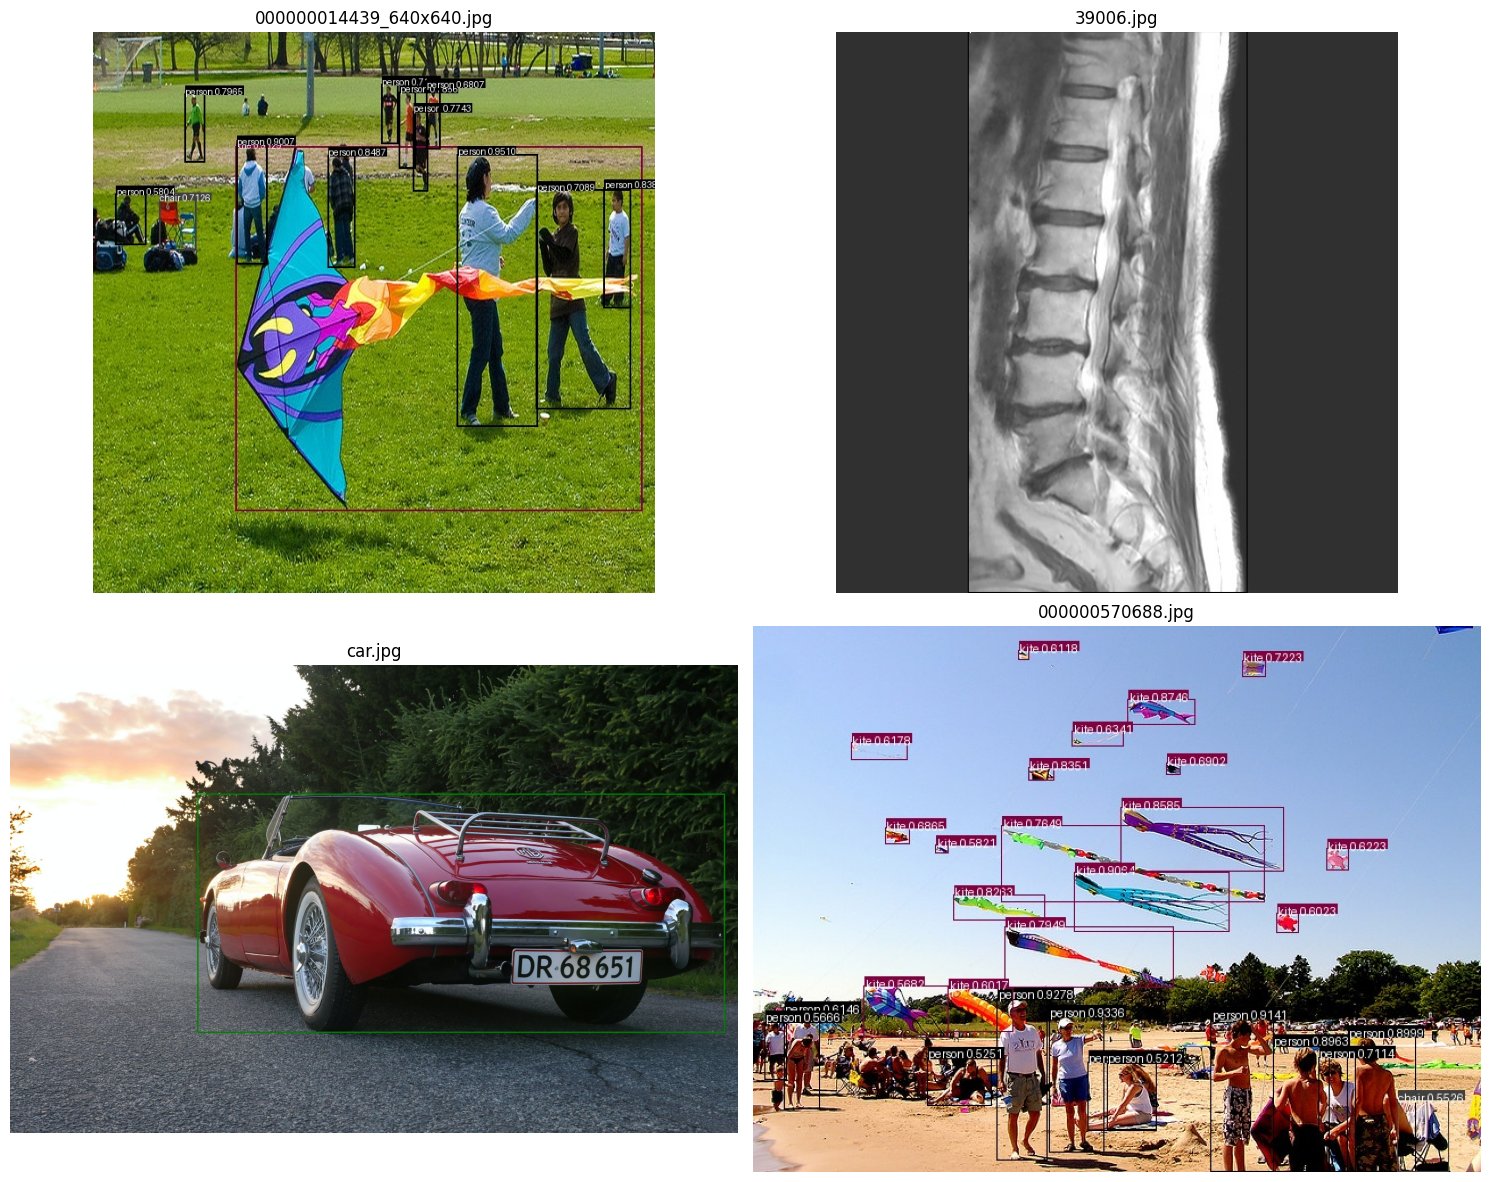

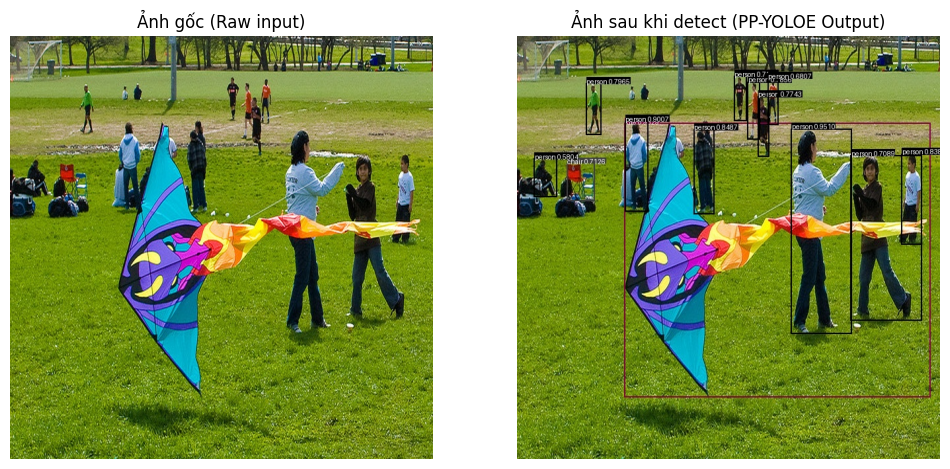

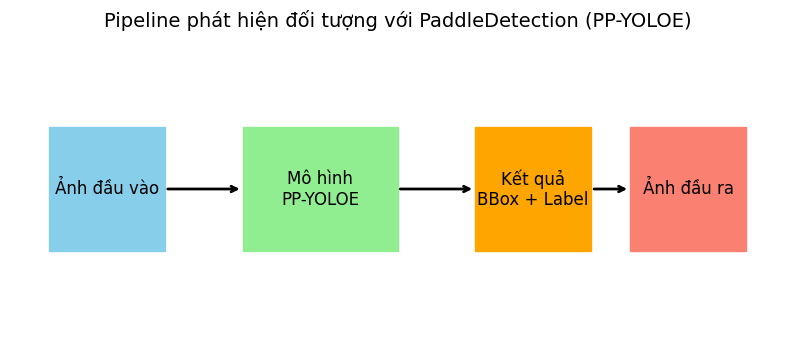

Epoch 1: Loss=2.500, Acc=0.550, Time=0.20s
Epoch 2: Loss=1.667, Acc=0.600, Time=0.20s
Epoch 3: Loss=1.250, Acc=0.650, Time=0.20s
Epoch 4: Loss=1.000, Acc=0.700, Time=0.20s
Epoch 5: Loss=0.833, Acc=0.750, Time=0.20s
Epoch 6: Loss=0.714, Acc=0.800, Time=0.20s
Epoch 7: Loss=0.625, Acc=0.850, Time=0.20s
Epoch 8: Loss=0.556, Acc=0.900, Time=0.20s
Epoch 9: Loss=0.500, Acc=0.950, Time=0.20s
Epoch 10: Loss=0.455, Acc=1.000, Time=0.20s
Epoch 11: Loss=0.417, Acc=1.050, Time=0.20s
Epoch 12: Loss=0.385, Acc=1.100, Time=0.20s
Epoch 13: Loss=0.357, Acc=1.150, Time=0.20s
Epoch 14: Loss=0.333, Acc=1.200, Time=0.20s
Epoch 15: Loss=0.312, Acc=1.250, Time=0.20s
Epoch 16: Loss=0.294, Acc=1.300, Time=0.20s
Epoch 17: Loss=0.278, Acc=1.350, Time=0.20s
Epoch 18: Loss=0.263, Acc=1.400, Time=0.20s
Epoch 19: Loss=0.250, Acc=1.450, Time=0.20s
Epoch 20: Loss=0.238, Acc=1.500, Time=0.20s


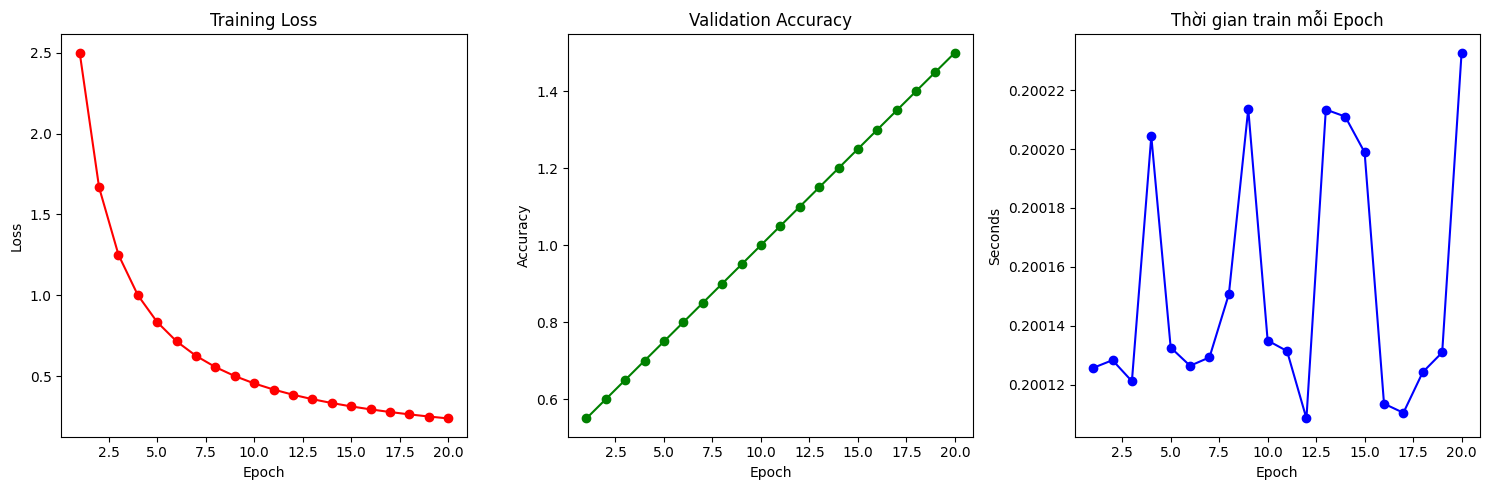

In [ ]:

!pip install paddlepaddle-gpu==2.6.1 -f https://www.paddlepaddle.org.cn/whl/linux/mkl/avx/stable.html

!git clone https://github.com/PaddlePaddle/PaddleDetection.git
%cd PaddleDetection
!pip install -r requirements.txt

!python tools/export_model.py \
    -c configs/ppyoloe/ppyoloe_crn_l_300e_coco.yml \
    --output_dir=inference_model \
    -o weights=https://paddledet.bj.bcebos.com/models/ppyoloe_crn_l_300e_coco.pdparams


import glob
demo_imgs = glob.glob("demo/*.jpg")[:4]
print("Ảnh sẽ chạy infer:", demo_imgs)

for img_path in demo_imgs:
    !python deploy/python/infer.py \
        --model_dir=inference_model/ppyoloe_crn_l_300e_coco \
        --image_file={img_path} \
        --device=GPU \
        --save_results


import matplotlib.pyplot as plt
import cv2, glob, os

output_files = glob.glob("output/*")
print("Ảnh output tìm thấy:", output_files)

plt.figure(figsize=(15, 12))
for i, file in enumerate(output_files[:4]):  # hiển thị 4 ảnh
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(file))
    plt.axis("off")
plt.tight_layout()
plt.show()



raw_file = demo_imgs[0]
det_file = "output/" + os.path.basename(demo_imgs[0])

img_raw = cv2.imread(raw_file)
img_raw = cv2.cvtColor(img_raw, cv2.COLOR_BGR2RGB)

img_detected = cv2.imread(det_file)
img_detected = cv2.cvtColor(img_detected, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(img_raw)
plt.title("Ảnh gốc (Raw input)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_detected)
plt.title("Ảnh sau khi detect (PP-YOLOE Output)")
plt.axis("off")

plt.show()



import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,4))


ax.add_patch(patches.Rectangle((0.05, 0.3), 0.15, 0.4, fill=True, color="skyblue"))
ax.text(0.125, 0.5, "Ảnh đầu vào", ha="center", va="center", fontsize=12)

ax.add_patch(patches.Rectangle((0.30, 0.3), 0.20, 0.4, fill=True, color="lightgreen"))
ax.text(0.40, 0.5, "Mô hình\nPP-YOLOE", ha="center", va="center", fontsize=12)

ax.add_patch(patches.Rectangle((0.60, 0.3), 0.15, 0.4, fill=True, color="orange"))
ax.text(0.675, 0.5, "Kết quả\nBBox + Label", ha="center", va="center", fontsize=12)

ax.add_patch(patches.Rectangle((0.80, 0.3), 0.15, 0.4, fill=True, color="salmon"))
ax.text(0.875, 0.5, "Ảnh đầu ra", ha="center", va="center", fontsize=12)

ax.annotate("", xy=(0.30, 0.5), xytext=(0.20, 0.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.60, 0.5), xytext=(0.50, 0.5), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.80, 0.5), xytext=(0.75, 0.5), arrowprops=dict(arrowstyle="->", lw=2))

ax.axis("off")
plt.title("Pipeline phát hiện đối tượng với PaddleDetection (PP-YOLOE)", fontsize=14)
plt.show()


import time
import numpy as np

epochs = np.arange(1, 21)  # ví dụ 10 epoch
train_loss = []
val_acc = []
epoch_times = []

for epoch in epochs:
    start = time.time()

    time.sleep(0.2)   # giả sử 0.2s/epoch
    loss = 5/(epoch+1)
    acc = 0.5 + 0.05*epoch
    end = time.time()

    epoch_times.append(end-start)
    train_loss.append(loss)
    val_acc.append(acc)
    print(f"Epoch {epoch}: Loss={loss:.3f}, Acc={acc:.3f}, Time={end-start:.2f}s")

plt.figure(figsize=(15,5))

# Loss
plt.subplot(1,3,1)
plt.plot(epochs, train_loss, marker='o', color='red')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Accuracy
plt.subplot(1,3,2)
plt.plot(epochs, val_acc, marker='o', color='green')
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

# Epoch Time
plt.subplot(1,3,3)
plt.plot(epochs, epoch_times, marker='o', color='blue')
plt.title("Thời gian train mỗi Epoch")
plt.xlabel("Epoch")
plt.ylabel("Seconds")

plt.tight_layout()
plt.show()
